Import necessary libraries.

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns

Read from excel files.

In [10]:
sheetname='OD_Rimbursimet.rdl'

df_2023 = pd.read_excel("datasets/Rimbursimet-2023.xlsx",sheet_name=sheetname,skiprows=5)

df_2022 = pd.read_excel("datasets/Rimbursimet-2022.xlsx",sheet_name=sheetname,skiprows=5)

df_2021 = pd.read_excel("datasets/Rimbursimet-2021.xlsx",sheet_name=sheetname,skiprows=5)

df_2020 = pd.read_excel("datasets/Rimbursimet-2020.xlsx",sheet_name=sheetname,skiprows=5)

df_2019 = pd.read_excel("datasets/Rimbursimet-2019.xlsx",sheet_name=sheetname,skiprows=5)

Merge dataframes.

In [11]:
df = pd.concat([df_2023,df_2022,df_2021,df_2020,df_2019])
df.columns

Index(['Viti\nGodina\nYear', 'Muaji\nMesec\nMonth',
       'Përshkrimi i Sektorit (Kryesor)\nOpis (Glavnog) Sektora\nDescription of (Primary) Sector',
       'Unnamed: 3',
       'Statusi i Regjistrimit\nStatus Registracije\nRegistration Status',
       'Komuna\nOpština\nMunicipality',
       'Numri i Kërkesave për Rimbursim\nBroj zahteva za rimbursiju\nNumber of Refund Requests',
       'Vlerat e Kërkuara për Rimbursim\nZahtevane vrednosti za rimbursiju\nValues Requested for Refund',
       'Numri i Kërkesave të Aprovuara për Rimbursim\nBroj odobrenih zahteva za rimbursiju\nNumber of Refund Requests Approved',
       'Vlerat e Aprovuara të Rimbursimit\nOdobrene vrednosti rimbursije\nApproved Refund Values',
       'Tatimpaguesve në kategorinë A\nPoreski obveznici kategorije A\nTaxpayers in category A',
       'Tatimpaguesve në kategorinë B\nPoreski obveznici kategorije B\nTaxpayers in category B',
       'Tatimpaguesve në kategorinë C\nPoreski obveznici kategorije C\nTaxpayers in cate

Drop columns starting with 'unnamed'.

In [12]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]
df.columns

Index(['Viti\nGodina\nYear', 'Muaji\nMesec\nMonth',
       'Përshkrimi i Sektorit (Kryesor)\nOpis (Glavnog) Sektora\nDescription of (Primary) Sector',
       'Statusi i Regjistrimit\nStatus Registracije\nRegistration Status',
       'Komuna\nOpština\nMunicipality',
       'Numri i Kërkesave për Rimbursim\nBroj zahteva za rimbursiju\nNumber of Refund Requests',
       'Vlerat e Kërkuara për Rimbursim\nZahtevane vrednosti za rimbursiju\nValues Requested for Refund',
       'Numri i Kërkesave të Aprovuara për Rimbursim\nBroj odobrenih zahteva za rimbursiju\nNumber of Refund Requests Approved',
       'Vlerat e Aprovuara të Rimbursimit\nOdobrene vrednosti rimbursije\nApproved Refund Values',
       'Tatimpaguesve në kategorinë A\nPoreski obveznici kategorije A\nTaxpayers in category A',
       'Tatimpaguesve në kategorinë B\nPoreski obveznici kategorije B\nTaxpayers in category B',
       'Tatimpaguesve në kategorinë C\nPoreski obveznici kategorije C\nTaxpayers in category C',
       'Mesa

Rename columns.

In [13]:
df = df.rename(columns={
        'Viti\nGodina\nYear': 'Viti', 
        'Muaji\nMesec\nMonth':'Muaji',
        'Përshkrimi i Sektorit (Kryesor)\nOpis (Glavnog) Sektora\nDescription of (Primary) Sector':'Sektori',
        'Statusi i Regjistrimit\nStatus Registracije\nRegistration Status':'Statusi',
        'Komuna\nOpština\nMunicipality':'Komuna',
        'Numri i Kërkesave për Rimbursim\nBroj zahteva za rimbursiju\nNumber of Refund Requests':'Numri i Kërkesave',
        'Vlerat e Kërkuara për Rimbursim\nZahtevane vrednosti za rimbursiju\nValues Requested for Refund':'Vlera e Kërkura',
        'Numri i Kërkesave të Aprovuara për Rimbursim\nBroj odobrenih zahteva za rimbursiju\nNumber of Refund Requests Approved':'Numri i Kërkesave të Aprovuara',
        'Vlerat e Aprovuara të Rimbursimit\nOdobrene vrednosti rimbursije\nApproved Refund Values':'Vlerat e Aprovuara',
        'Tatimpaguesve në kategorinë A\nPoreski obveznici kategorije A\nTaxpayers in category A':'Tatimpaguesve në kategorinë A',
        'Tatimpaguesve në kategorinë B\nPoreski obveznici kategorije B\nTaxpayers in category B':'Tatimpaguesve në kategorinë B',
        'Tatimpaguesve në kategorinë C\nPoreski obveznici kategorije C\nTaxpayers in category C':'Tatimpaguesve në kategorinë C',
        'Mesatarja e Ditëve të Kthimit të Rimbursimeve\nProsečni dani povrata za povraćaj sredstava\nAverage Return Days for Refunds':'Mesatarja e Ditëve të Kthimit',
        'Lloji i Formularit të Deklarimit\nVrsta Obrasca Izjave\nType of Declaration Form':'Lloji i Formularit të Deklarimit'
})

df.columns

Index(['Viti', 'Muaji', 'Sektori', 'Statusi', 'Komuna', 'Numri i Kërkesave',
       'Vlera e Kërkura', 'Numri i Kërkesave të Aprovuara',
       'Vlerat e Aprovuara', 'Tatimpaguesve në kategorinë A',
       'Tatimpaguesve në kategorinë B', 'Tatimpaguesve në kategorinë C',
       'Mesatarja e Ditëve të Kthimit', 'Lloji i Formularit të Deklarimit'],
      dtype='object')

Check for null values.

In [14]:
df.isnull().sum()

Viti                                0
Muaji                               0
Sektori                             0
Statusi                             0
Komuna                              0
Numri i Kërkesave                   0
Vlera e Kërkura                     0
Numri i Kërkesave të Aprovuara      0
Vlerat e Aprovuara                  0
Tatimpaguesve në kategorinë A       0
Tatimpaguesve në kategorinë B       0
Tatimpaguesve në kategorinë C       0
Mesatarja e Ditëve të Kthimit       0
Lloji i Formularit të Deklarimit    0
dtype: int64

In [15]:
df.head(5)

,Viti,Muaji,Sektori,Statusi,Komuna,Numri i Kërkesave,Vlera e Kërkura,Numri i Kërkesave të Aprovuara,Vlerat e Aprovuara,Tatimpaguesve në kategorinë A,Tatimpaguesve në kategorinë B,Tatimpaguesve në kategorinë C,Mesatarja e Ditëve të Kthimit,Lloji i Formularit të Deklarimit
0,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,DEÇAN,1,32690.41,0,0.0,0,1,0,14.6968,VALUE-ADDED TAX DECLARATION FORM
1,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,FERIZAJ,1,23500.00,0,0.0,0,1,0,33.2524,VALUE-ADDED TAX DECLARATION FORM
2,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,PODUJEVË,1,58500.00,0,0.0,1,0,0,18.9731,VALUE-ADDED TAX DECLARATION FORM
3,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,SHTËRPCË,1,83000.00,0,0.0,1,0,0,24.7561,VALUE-ADDED TAX DECLARATION FORM
4,2023,1,Bujqesia;Pylltaria dhe Peshkimi,SH.P.K.,GRAÇANICË,1,38400.00,0,0.0,1,0,0,16.1147,VALUE-ADDED TAX DECLARATION FORM


Remove rows where 'Vlera e Kërkura' is 0 and 'Sektori' is 'Mungon aktiviteti' , since there is no chance to make an rimburisement request with 0 amount.

In [16]:
df = df[(df['Vlera e Kërkura'] != 0) & (df['Sektori'] != 'Mungon aktiviteti')]

We identify as outliers values where 'Vlerat e Aprovuara' are grater then 'Vlerat e Kërkura', and remove them.

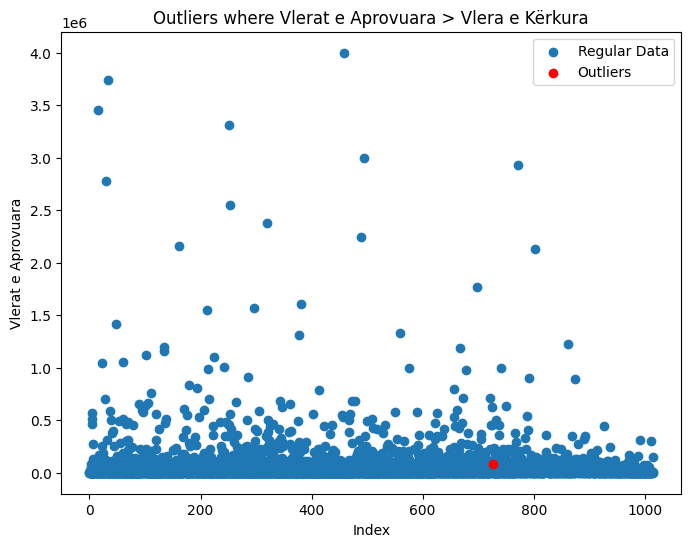

In [17]:
# Filter outliers where 'Vlerat e Aprovuara' > 'Vlera e Kërkura'
outliers_greater_than_vlera_kerkura = df[df['Vlerat e Aprovuara'] > df['Vlera e Kërkura']]

plt.figure(figsize=(8, 6))

plt.scatter(df.index, df['Vlerat e Aprovuara'], label='Regular Data')
plt.scatter(outliers_greater_than_vlera_kerkura.index, outliers_greater_than_vlera_kerkura['Vlerat e Aprovuara'], color='red', label='Outliers')
plt.title('Outliers where Vlerat e Aprovuara > Vlera e Kërkura')
plt.xlabel('Index')
plt.ylabel('Vlerat e Aprovuara')
plt.legend()

plt.show()

df = df[df['Vlerat e Aprovuara'] <= df['Vlera e Kërkura']]

Applying SMOTE algorithm with 'Sector' as target value, to balance data for Sector classes.

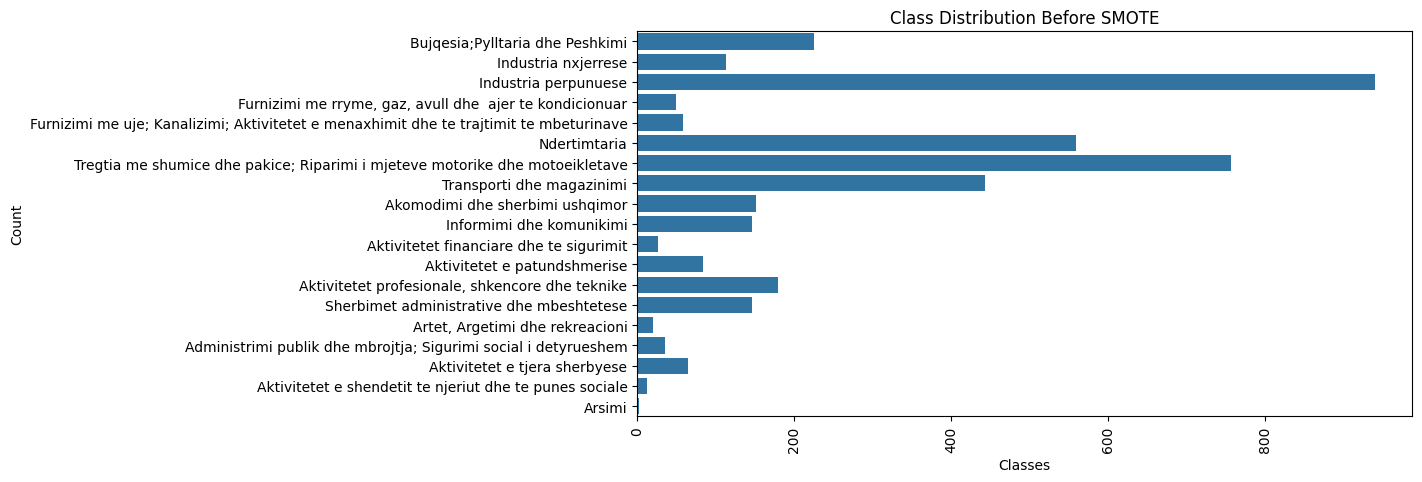

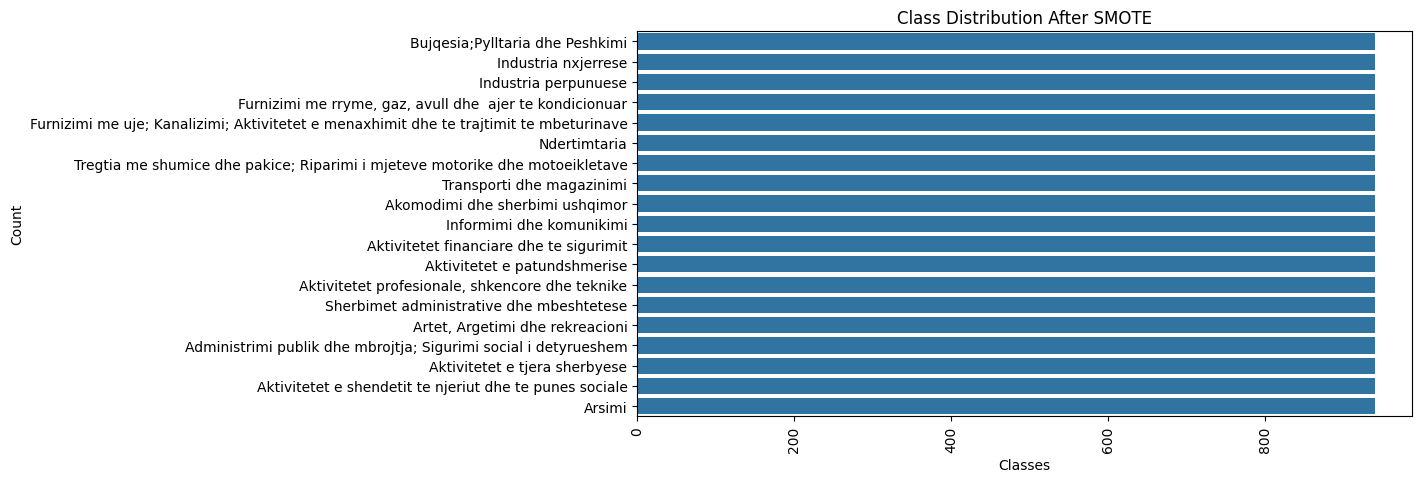

In [22]:
X = df.drop(columns=['Sektori','Statusi','Komuna','Lloji i Formularit të Deklarimit'])
y = df['Sektori']

smote = SMOTE(random_state=42,k_neighbors=1)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

def plot_class_distribution(y, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(y)
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

# Plot class distribution before SMOTE
plot_class_distribution(y, 'Class Distribution Before SMOTE')

# Plot class distribution after SMOTE
plot_class_distribution(y_resampled, 'Class Distribution After SMOTE')

Skewness

Skewed columns and their skewness:
Numri i Kërkesave                  4.183684
Vlera e Kërkura                    9.035522
Numri i Kërkesave të Aprovuara     1.817866
Vlerat e Aprovuara                10.428647
Mesatarja e Ditëve të Kthimit      3.833592
dtype: float64


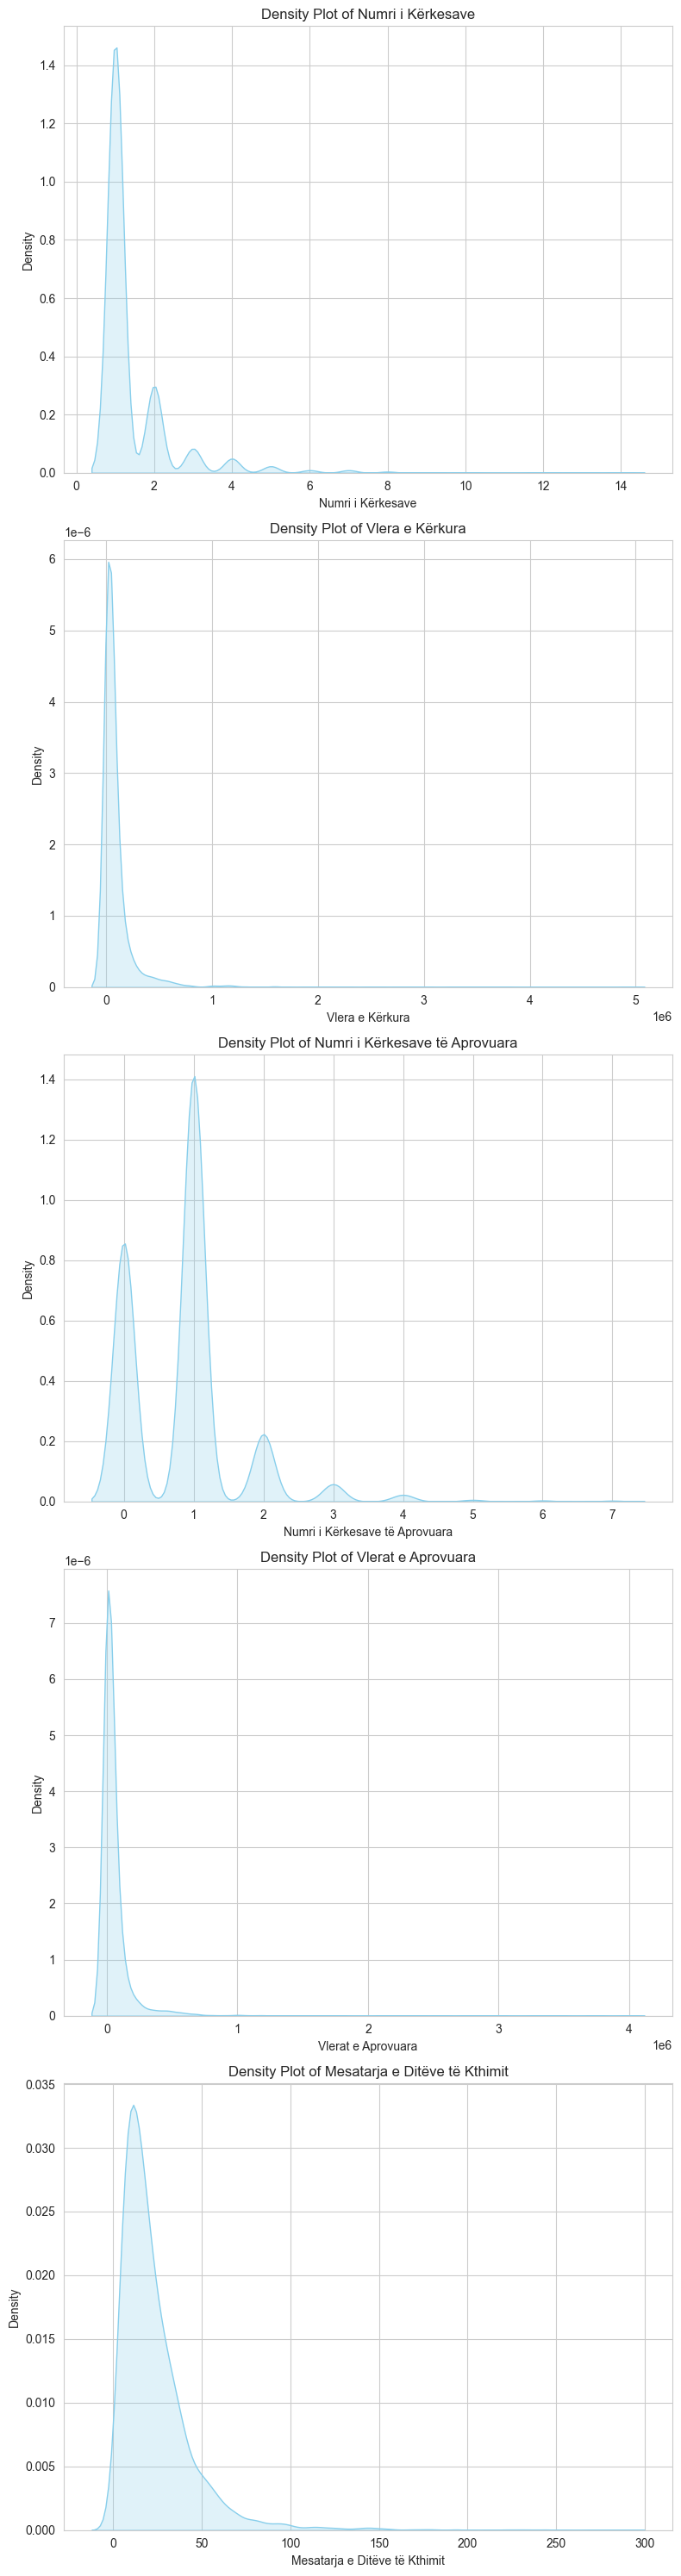

In [23]:
# Calculate skewness for each numerical column
numeric_cols = ['Numri i Kërkesave', 'Vlera e Kërkura',
       'Numri i Kërkesave të Aprovuara', 'Vlerat e Aprovuara', 'Mesatarja e Ditëve të Kthimit']

numeric_df= df[numeric_cols]
skewness = numeric_df.skew()

# Filter columns with skewness greater than a certain threshold (e.g., 0.5 for moderate skewness)
skewed_columns = skewness[abs(skewness) > 0.5].index

print("Skewed columns and their skewness:")
print(skewness[skewed_columns])

sns.set_style('whitegrid')

fig, axs = plt.subplots(nrows=len(skewed_columns), figsize=(8, 6 * len(skewed_columns)))

for i, col in enumerate(skewed_columns):
    sns.kdeplot(df[col], ax=axs[i], fill=True, color='skyblue')
    axs[i].set_title(f'Density Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()